In [6]:
import funcs
import cv2 as cv
import main
import Information_extraxion as ie
import matplotlib.pyplot as plt

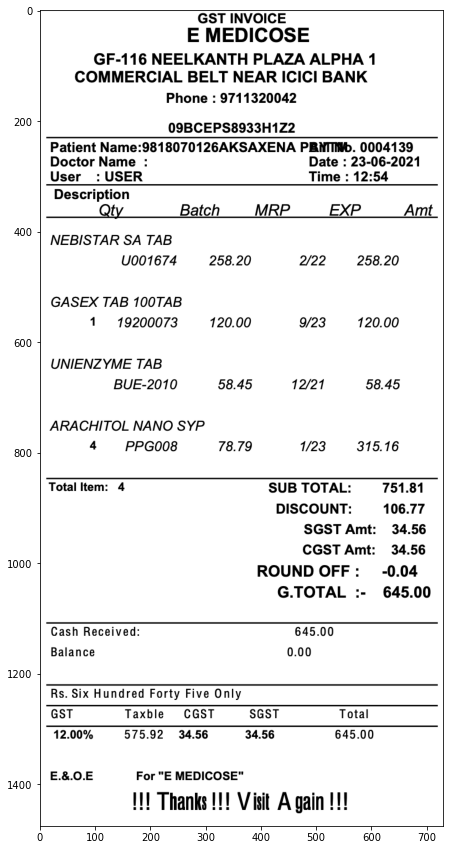

In [5]:
img = cv.imread("img.png")

figure = plt.figure(figsize = (15,15))
plt.imshow(img)

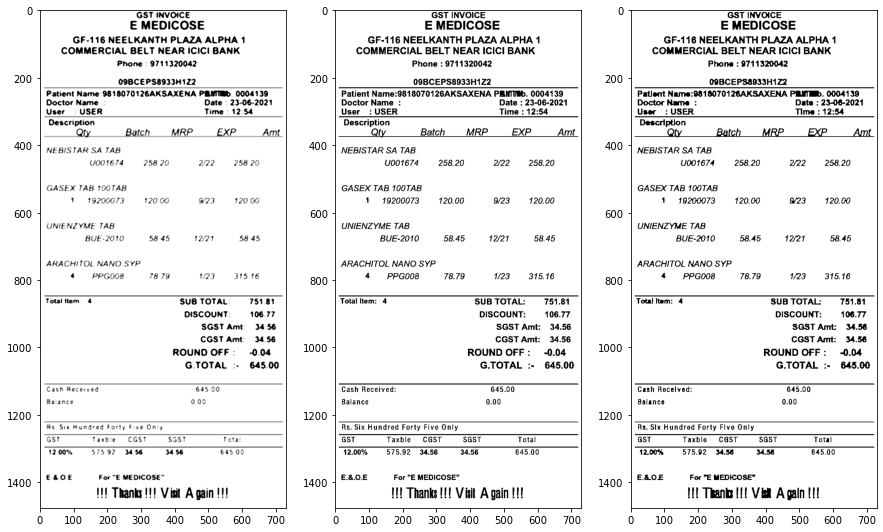

In [7]:
blur, thres, ed = funcs.pre_process(img)

fig = plt.figure(3, figsize=(15,15))

fig.add_subplot(1,3, 1)
plt.imshow(blur, cmap= "gray")


fig.add_subplot(1,3,2)
plt.imshow(thres, "gray")

fig.add_subplot(1,3,3)
plt.imshow(ed, "gray")

plt.show()

In [8]:
# Text Extraction with OCR (tesserocr)
text, bbox = funcs.text_extraction(ed)
print(text)

GST INVOICE
E MEDICOSE
GF-116 NEELKANTH PLAZA ALPHA 1
COMMERCIAL BELT NEAR ICICI BANK
Phone : 9711320042
09BCEPS8933H1Z2
Patlent Name:9818070126AKSAXENA PRINTED. 0004139
Doctor Name : Date : 23-06-2021
User: USER Time : 12:54
Description
—__@fy Batch MRP EXP Amt
NEBISTAR SA TAB
U001674 258.20 2/22 258.20
GASEX TAB 100TAB
1 19200073 120.00 9/23 120.00
UNIENZYME TAB
BUE-2010 58.45 12/21 58.45
ARACHITOL NANO SYP
4 PPGOOS8 78.79 23 315.16
Total Item: 4 SUB TOTAL: 751.81
DISCOUNT: 106.77
SGSTAmt 34.56
CGST Amt: 44.56
ROUND OFF: -0.04
G.TOTAL :- 645.00
Cash Recelved: 645.00
Balance 0.00
Rs. Slx Hundred Forty Five Only
@ST Taxble C@ST SGST Total
12.00% 575.92 34.56 M436 645.00
E&O£ For "E MEDICOSE™
UN Tikarns tt Vit A gain It!



In [10]:
# Information extraction with regular expression matching

c = ie.regex()
print(c.info_extract(text))

{'Phone Number': ['9711320042'], 'Date': ['23-06-2021'], 'Patient Name': ['9818070126AKSAXENA'], 'Time': ['12:54'], 'total_items': ['4'], 'sub_total': ['751.81'], 'discount': ['106.77'], 'sgst': ['34.56'], 'cgst': ['44.56'], 'round_off': ['-0.04'], 'grand_total': ['645.00'], 'balance': ['0.00'], 'cash_r': 645.0}


In [11]:
# Items
items = main.item_extraction(text)
print(items)

['NEBISTAR SA TAB', 'U001674 258.20 2/22 258.20', 'GASEX TAB 100TAB', '1 19200073 120.00 9/23 120.00', 'UNIENZYME TAB', 'BUE-2010 58.45 12/21 58.45', 'ARACHITOL NANO SYP', '4 PPGOOS8 78.79 23 315.16']
